<style>       
    hr{
        height: 4px;
        background-color: rgb(247,148,9);
        border: none;
    }
</style>
<div style="color=white;
           display:fill;
           border-radius:5px;
           background-color:rgb(34,41,49)">
<hr>
<div align="right"><i>BTE5034 - Digital Signal Processing &nbsp;</i></div>
<div align="right">EIT - BFH &nbsp;</div>

# Numerical Example: DSP with Python, Numpy, and Matplotlib
<hr>
</div>

Welcome to the first Signal Processing lab! The goal of this initial Jupyter notebook is to introduce (or review) the basics of Python and of the numerical libraries that we will use in the rest of the labs.

In recent years, Python has become an increasingly popular programming language with the signal processing community, primarily due to the availability of powerful libraries such as Numpy, SciPy, and MatPlotlib. These numerical toolboxes have reached a level of maturity and completeness that puts them on a par with proprietary (and costly) software frameworks such as Matlab. In this notebook we will cover the most important functionalities that these library offer and highlight how nicely they play with the Jupyter notebook paradigm. 

# Preliminaries 

## Python 

Given that this is a class developed for Computer Science students, we will assume you are already quite familiar with programming; the goal here is not to teach you how to code but simply to point out some of the specificitiess of the Python language. 

If you feel that your could benefit from a more in-depth introduction to Python, the Internet abounds with very good tutorials such as [this one](https://www.freecodecamp.org/news/the-python-guide-for-beginners/)

## Libraries

With Python, you immediately gain access to a vast number of open-source libraries developed by the community. Libraries are composed of different modules, and each module can be imported individually in your own code if only a subset of the library's functionalities are needed.

In order to use a library or one of its modules, the library must be intstalled in you Python environment. For this, you can use a package manager such as ``pip`` or ``conda`` if you use the Anaconda distribution. Here's an example of how to install the ``numpy`` and ``matplotlib`` libraries using pip from the terminal:

    python -m pip install -U numpy
    python -m pip install -U matplotlib

Once a library is installed, you can import it (or any of its modules) into your Python program using the ``import`` statement, which also allows you to choose alternate aliases for the associeated namespace:

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import IPython
import math

In [71]:
N = 3
w = 2 * np.pi / N

A = np.array([[1, 1, 1], [1, np.cos(w), np.cos(2 * w)], [1, np.cos(2 * w), np.cos(4 * w)] ])  

A @ A.T

array([[ 3.00000000e+00, -2.22044605e-16,  3.33066907e-16],
       [-2.22044605e-16,  1.50000000e+00,  1.50000000e+00],
       [ 3.33066907e-16,  1.50000000e+00,  1.50000000e+00]])

## Getting help

The Python `help()` function is a handy tool for understanding modules, functions, and more. It provides built-in access to the the official documentation directly from within the Python environment.

For instance, if you want to know more about the `sqrt` function in the `math` module, you can type `help(math.sqrt)`. This will display a brief summary of what the function does, a description of its mandatory and optional parameters, the return type, and so on.

By calling `help()` without arguments. an interactive help session will start. To exit the help session, just type `quit` and press enter. **Try it for yourself!**

In [30]:
# uncomment the statement below to run the interactive help; the line is 
#  commented so that if you run all notebook cells, the execution doesn't stop here.

#help()

# Python Lists

Python has several basic data types, including integers, floats, and strings; they are behaving as expected and Python will automatically upcast numerical types if needed.
To know a variable's type, you can use of the `type()` built-in function. 

In Python, data arrays are known as _lists_;  a list is a _mutable_ ordered collection of items of any type ("mutable" means that the values in the list can be changed).

## Creating lists

There are many ways to define a list; explicitly, for instance, you can use a comma-separated sequence of items enclosed in square brackets, e.g. 

In [38]:
my_list = ["Code", "Favtutor", "Machine Learning", "Students", "Studies", "Java", "Python"]

In [43]:
a = range(1, 12)
print(a)

range(1, 12)


Another way is to populate a list by reading data from disk. As a fun and more realistic example, let's load a digital audio signal into a list and play the result (don't worry too much about the code details but feel free to look up any function you're curious about)

In [45]:
from scipy.io import wavfile

Fs, piano = wavfile.read("data/piano.wav")
IPython.display.Audio(piano, rate=Fs)

In [47]:
print(len(piano))

32768


## List indexing and slicing

Extraction of a single element from a list can be achieved by single indexing : 

 `my_list[2]` returns `"Machine Learning"` 

Like in Java, lists are indexed from 0. In Python, on the other hand, elements can also be indexed *backwards* starting from the end of the list by using negative values; not that this allows you to select, say, the last element of a list even if the length is unknown

 `my_list[-1]` returns `"python"`

The following list manipulation examples refer to the following diagram 

<img src="img/list_indices.png" width=600/>

* sub-arrays can be extracted by *slicing*; the following syntax will return the elements from the start index up to **but not including** the end index:

  `my_list[2:6]` returns `["Machine Learning", "Students", "Studies", "Java"]`

* in a slice, if the `start` index is omitted, its value is assumed to be $0$:

  `my_list[:n]` is the same as `my_list[0:n]`

* similarly, if the `end` index is omitted, the slice will contain all elementsd from the start index up to the end of the list (including the last element):

  `my_list[n:]` is the same as `my_list[n:7]`

* slices can include a step size as an optional third slice parameter

  `my_list[2::2]` returns `["Machine Learning", "Studies", "python"]`


Finally, note that slicing indexes can be defined as `slice` objects and reused: 

In [49]:
odd_elements = slice(1,10,2)

print(my_list[odd_elements])
print(piano[odd_elements])

['Favtutor', 'Students', 'Java']
[30 31 30 30 29]


### Exercise: subsampling

Use slicing to extract one out of every 4 samples from the audio signal that was loaded earlier; play the result and compare it to the original. Can you change one of the parameters in the playing function so that the sliced signal has the same pitch as the original?

In [51]:
piano_sub = piano[::4]

In [53]:
print(len(piano), len(piano_sub))

32768 8192


Let's now play the sliced signal but reduce the sampling rate by the slicing step; can you explain intuitively what's happening?

In [ ]:
IPython.display.Audio(piano_sub, rate=Fs/4)

### Exercise: time reversal

Time-reverse the audio signal using slicing (hint: the step size can be negative too!)

In [55]:
piano_rev = piano[::-1]

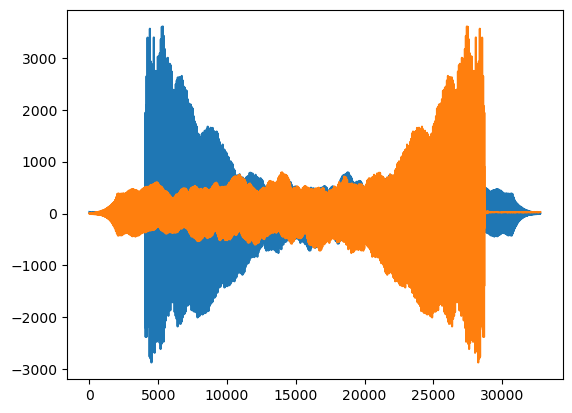

In [59]:
plt.plot(piano)
plt.plot(piano_rev)

## List comprehension

List comprehensions provides a concise way to create lists based on other lists; the list is created by applying a given expression to the elements of an existing list, possibly with coditional execution. The general syntax is

  `[f(x) for x in list]`

For instance:

In [62]:
pw2 = [ 2 ** x for x in range(10) b]
print("powers of 2:", pw2)

powers of 2: [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]


### Exercise

Create a list named containing 10 consecutive values of a sinusoidal signal (you can use the `sin` function from the `math` module)

In [ ]:
sin_signal = ...
print("sin signal:", sin_signal)

# Data visualization with MatplotLib

One of the (if not _the_) most widely used plotting library in Python is Matplotlib. In Jupyter notebooks Matplotlib can produce its output inline directly after the cell containing the plotting directives. Instead of trying to list the library's functionalities, here are some usage examples that will reappear in the rest of the labs.

In [ ]:
# Generate sample data for the plots
n = np.arange(0, 100) # 100 values of the discrete-time index n
N = 50                # samples per period
w = 2 * np.pi / N     # discrete time frequency is 2pi / N
x1 = np.sin(w * n)
x2= np.cos(w * n) 

## Basic plots

Plotting a data set is as easy as invoking `plt.plot`.(Note that we follow the statement by a semicolon (';') otherwise Jupyter will print the return value of the plot function; try to remove the semicolon to see the result.)

In [ ]:
plt.plot(x1);

In the plot above, the data points contained in `x` are plotted against their index value (i.e. from 0 to 99)but you can specify the values for the horizontal axis as an array with the same length as the data array. Here for example we plot the sinusoid against the value of its phase

In [ ]:
plt.plot(n * w, x1);

You can change the size of a plot in two ways, either by instantiating the figure explicitly or by changing the default size

In [ ]:
plt.figure(figsize=(10, 2))
plt.plot(n, x1);

In [ ]:
# this will make all subsequent plots this size
plt.rcParams["figure.figsize"] = (12,4)

## Stem plots (aka "lollipop plots")

Discrete-time signals are usually drawn using stem plots in order to emphasize the fact that they are a _countable sequence_ of values and not a continuous-time function.

In [ ]:
plt.stem(n, x1);

Stem plots generally look too "busy" when there are too many data points; in these cases therefore we prefer to plot signals the same way in which we would graph a function. In Matplotlib, this means that we will can use `plt.stem` if the data points are few or when we want to explicitly show the discrete-time nature of the signal; when dealing with a large amout of data we will use `plt.plot` instead, which will allow us to observe the overall amplitude envelope of a signal.

We can encode these preferences in a utility function like so:

In [ ]:
def plot_data(data, *args, **kwargs):
    MAX_SIZE = 60
    if len(data) > MAX_SIZE:
        plt.plot(data, *args, **kwargs)
    else: 
        plt.stem(data, *args, **kwargs)

Remember our original audio signal of a piano note ? Let's have a look at it.

In [ ]:
plot_data(piano, 'g')
plt.ylabel("Amplitude")
plt.title("Original Signal");

Interesting, let's now zoom in and have a look at specific part of the signal.

In [ ]:
plot_data(piano[5000:5050])
plt.ylabel("Amplitude")
plt.title("Zoomed-in view of the original signal")

## Colors and lines

In Matplotlib you can customize virtually any plotting parameter; note that you can use LaTeX notation in labels, as well as f-strings.

In [ ]:
# First line with various customizations
plt.plot(
    n, x1,                  # we're plotting y1 against x
    label=f"$\\sin(2\\pi n / {N})$",      # the label can be used to draw a legend
    color="blue",           # Line color
    linestyle="--",         # Dashed line
    linewidth=2,            # Line width
    marker="o",             # Circular markers
    markersize=6,           # Marker size
    markerfacecolor="red",  # Marker color
    markeredgecolor="black",# Marker edge color
    alpha=0.8               # Transparency
)

# Second line with different customizations
plt.plot(
    n, x2, 
    label=f"$\\cos(2\\pi n / {N})$",
    color="green",        
    linestyle="-.",          # Dash-dot line
    linewidth=2, 
    marker="s",              # Square markers
    markersize=6, 
    markerfacecolor="yellow",
    markeredgecolor="black",
    alpha=0.8
)

# Add titles and labels
plt.title("sinusoidal signals in discrete time")
plt.xlabel("$n$")
plt.ylabel("$x[n]$")

# Add grid, legend, and limits
plt.grid(True)
plt.legend(fontsize=12)

# you can change the limits of the axes
plt.xlim(0, 35)
plt.ylim(-1.5, 1.5)

# Display the plot and close it to release memory (these are optional but good practice)
plt.show()
plt.close()

## Subplots

Another useful Matplotlib tool is subplots, often used to show multiple plots at a time.

In [ ]:
def my_plot(x, attr, label, title):
    plt.plot(x, attr, label=label)
    plt.legend()
    plt.title(title)


# Plotting sin(x) in the top-left
plt.subplot(2,2,1)
my_plot(x1, 'b', f'$\\sin(2\\pi n / {N})$', 'subplot(2,2,1)')

# Plotting cos(x) in the top-right
plt.subplot(2,2,2)
my_plot(x2, 'g:', f'$\\cos(2\\pi n / {N})$', 'subplot(2,2,2)')

# Plotting sin(x)*cos(x) in the bottom-left
plt.subplot(2,2,3)
my_plot(x1 * x2, 'm-.', f'$\\sin(2\\pi n / {N})\\cos(2\\pi n / {N})$', 'subplot(2,2,3)')

# Plotting all three in the bottom-right
plt.subplot(2,2,4)
my_plot(x1, 'b', f'$\\sin(2\\pi n / {N})$', 'subplot(2,2,1)')
my_plot(x2, 'g:', f'$\\cos(2\\pi n / {N})$', 'subplot(2,2,2)')
my_plot(x1 * x2, 'm-.', f'$\\sin(2\\pi n / {N})\\cos(2\\pi n / {N})$', 'subplot(2,2,3)')

plt.tight_layout()  # Ensures that title, labels, and axes do not overlap

### Exercise:

Using the above code block as a template, plot the first 30 points of the audio signal, of its subsampled and of its time-reversd versions, first individually and then all in the same plot. Use different colors and linestyles in the plots. 

# NumPy

NumPy is a well-established numerical library originally designed for vector and matrix operations (linear algebra). NumPy is an extremely popular tool and learning it is a good investment not only for our signal processing class but for all sorts of different applications and use-cases.

To get you started, this lab will focus on some simple linear algebra operations using NumPy and present a final application in image processing using the so-called Haar Basis.

## NumPy Arrays

NumPy arrays are an efficient implementation of Python lists for numerical data types. There are two standard ways of creating NumPy arrays:
 * transform a list object via type casting
 * use NumPy's various built-in functions

In [ ]:
# Here we create a two-dimensional array from Python lists.
matr = np.array([[1,2,3],[4,5,6]])

# There exist various built-in functions to easily create different array objects:
vect = np.ones(5)

id_matrix = np.eye(5)

one_matrix = np.ones((5,3))

mat_array = np.zeros((2,3,3))
mat_array[:] = np.eye(3)

print(f"1D vector: \n{vect}\n")
print(f"2D matrix: \n{matr}\n")
print(f"Identity matrix: \n{id_matrix}\n")
print(f"Matrix of ones: \n{one_matrix}\n")
print(f"Array of identity matrices: \n{mat_array}\n")

### Data types

All NumPy arrays refer to an underlying data type; you can specify the type at creation time via the directive

``dtype=...``

or you cast existing arrays using the ``.astype()`` method.

In [ ]:
# Creating an array of integers
int_vect = np.array([1,2,3,4,5], dtype=np.int32)
print(int_vect.dtype)

# Cast int array to float array:
float_vect = int_vect.astype(np.float32)
print(float_vect.dtype)

# As we can see, multiplying with standard * two vectors will simply multiply components pairwise
# and output another vector. In fact we will see later on why.
print(int_vect * float_vect)

The features of NumPy arrays can be inspected via a series of attributes such as ``size``, ``shape``, and ``ndim``. This is particularly useful when working with multi-dimensional vectors or matrices.  

In [ ]:
matr = np.array([[1,2,3,4],[5,6,7,8]])
print("The dimension of the matrix is: {}\n".format(matr.ndim))
print("The shape of the matrix is: {}\n".format(matr.shape))
print("The size of the matrix is: {}\n".format(matr.size))
print("The data type of the matrix is: {}\n".format(matr.dtype))

### Reshaping

The structure of NumPy arrays can be modified using is the ``.reshape()`` method; note that the new shape must contain the same number of elements as the original shape. 

In [ ]:
# Creating a matrix of sequentials numbers:
matr = np.arange(10,20).reshape(5,2)
print("A matrix of size 5,2:\n{}\n".format(matr))

matr = matr.reshape(2,5)
print("A matrix of size 2,5:\n{}\n".format(matr))

### Broadcasting

Last but not least, broadcasting is a built-in method used by NumPy to apply transformations to arrays in an elegant and concise way. When appling operations to arrays of different sizes, NumPy attempts to extend ("broadcast") the smaller array so that it matches the size of the larger one. 

For example, when adding a vector ``vect`` to a matrix ``M``, the broadcasting step will expand the vector into a properly sized matrix.

In [ ]:
# Create a vector of length 5
vect = np.array([1,2,3,4,5])

# Matrix of 1s
matr = np.ones((4,5), dtype=np.int64)

print(f'A matrix M: \n{matr}\nand a vector v:\n{vect}\n')
 
print(f'v + M =\n{vect + matr}\n')
print(f'M + v =\n{matr + vect}\n')

# Note that you need at least ONE matching dimension:
matr_array = np.ones((4,4,5), dtype=np.int64)

print(f'A matrix array X: \n{matr_array}\n')
print(f'v + X =\n{vect + matr_array}\n')

Be aware that, for broacasting to work, the arrays must have at least one matching dimension:

In [ ]:
# Create a vector of length 5
vect = np.array([1,2,3,4,5])

# Matrix of 1s of size 4x6
matr = np.ones((4,6), dtype=np.int64)

try:
    res_3 = matr + vect
except ValueError as error:
    print("Broadcasting error: ", error)

More details on broadcasting are availabe [here](https://numpy.org/devdocs/user/basics.broadcasting.html).

### Exercise: reshaping a vector into a matrix

The following code takes all the pixels in a square image and stores them one after the other in a single 4096-element vector.

In [ ]:
original_image = np.array(plt.imread('img/cameraman.jpg'), dtype=int)
vect = np.ravel(original_image, "C")

Write the code to reshape the vector back into the original square image:

In [ ]:
img = ... # write your code here

In [ ]:
plt.subplot(1,2,1)
plt.imshow(original_image);
plt.subplot(1,2,2)
try:
    plt.imshow(img);
except TypeError:
    pass

# Linear algebra with NumPy

## Basic operators

NumPy provides most of the common linear algebra operations:
- inner product (aka dot product) of two vectors: ``np.vdot``
- matrix-vector or matrix-matrix standard multiplication: ``np.dot(M1,v1)`` or ``@`` 
- matrix inversion: ``np.linalg.inv``. 
- matrix transposition: ``.T``. 
- matrix L2 norm: ``np.linalg.norm``.
- solving a system of linear equations: ``np.linalg.solve``.

Below are some examples of vector-matrix manipulations; you can find more useful pointers [here](https://numpy.org/doc/stable/reference/routines.linalg.html)

In [ ]:
# instantiate two vectors:
v_1 = (np.random.rand(5) * 10).astype(int)
v_2 = (-np.random.rand(5) * 10).astype(int)
print(f'random vectors:\n v_1 = {v_1}\n v_2 = {v_2}')
print(f'inner product:\n <v_1, v_2> = {np.vdot(v_1, v_2)}\n')

# instantiate one matrix and one vector
M_1 = np.arange(1, 11).reshape(2, 5)
print(f'matrix M_1 =\n{M_1}')
print(f'matrix-vector product will assume v_1 is a column vector:\n M_1 v_1 = {np.dot(M_1, v_1)}\n')

A = np.arange(1, 10).reshape(3, 3)
b = np.ones(3)
print(f'matrix A =\n{A}\nvector b = \n{b}')
print('careful with square matrices! Vectors will be cast as row or column automatically')
print(f'A b = {np.dot(A, b)}')
print(f'b A = {np.dot(b, A)}\n')

# instantiate two matrices:
M_2 = np.array([[1, 2], [3, 4], [5, 6]])
M_3 = np.array([[1, 2, 3], [4, 5, 6]])
print(f'matrix M_2 =\n{M_2}')
print(f'matrix M_3 =\n{M_3}')
print(f'matrix products:\n M_2 M_3 =\n{np.dot(M_2, M_3)}')
print(f'M_3 M_2 =\n{np.dot(M_3, M_2)}')

### Exercise: matrix-vector operations

Let $A$ be the matrix : $$A = \begin{bmatrix} 1 & 2 & 1 \\ 3 & 0 & 1 \\ 0 & 2 & 4 \end{bmatrix}$$
and $\mathbf{v, w}$ the vectors: $$\mathbf{v} = \begin{bmatrix} 1 \\ 2 \\ 4 \end{bmatrix} \\ \mathbf{w} = \begin{bmatrix} 2 \\ 4 \\ 6 \end{bmatrix}$$

Complete the code below. 

In [ ]:
# define the matrix A and the vectors v and w
A = ... 
v = ...
w = ...

# compute the product of matrix A and vector v
print("Av = ", ...)

# compute the product of the transpose of vector w and matrix A
print("w^T A = ", ...)

# compute the dot product of vectors v and w
print("< v , w > = ", ...)

# compute the transpose of matrix A
print("A^T = ", ...)

### Exercise: change of basis in $\mathbb{R}^N$

**Short linear algebra review:** A vector space has an infinite number of possible bases and we can move from the representation in one base to another via a change of basis matrix. 

Assume $\{\mathbf{v}_k\}$, $k = 0, 1, \ldots, N-1$ is a basis for $\mathbb{R}^N$, the space of length-$N$ tuples of real numbers. Any vector $\mathbf{x} \in \mathbb{R}^N$ can be expressed as a linear combination

$$
  \mathbf{x} = \sum_{n=0}^{N-1} \alpha_n \mathbf{v}_n
$$

where the set of coefficients $\alpha_n$ is unique. In compact form we can write

$$
  \mathbf{x} = \mathbf{V}\begin{bmatrix} \alpha_0 \\ \vdots \\ \alpha_{N-1} \end{bmatrix}
$$

where $\mathbf{V}$ is an $N \times N$ matrix whsoe _columns_ are the $N$ basis vectors. 

Consider now another basis $\{\mathbf{w}_k\}$ and call $\mathbf{W}$ the matrix whose columns are the vectors $\{\mathbf{w}_k\}$; to express $\mathbf{x}$ in terms of this new basis we need to find a set of $N$ coefficients $\beta_n$ so that

$$
  \mathbf{x} = \mathbf{W}\begin{bmatrix} \beta_0 \\ \vdots \\ \beta_{N-1} \end{bmatrix}
$$

From this we have

$$
  \begin{bmatrix} \beta_0 \\ \vdots \\ \beta_{N-1} \end{bmatrix} = \mathbf{W}^{-1}\mathbf{x} = \mathbf{W}^{-1}\mathbf{V}\begin{bmatrix} \alpha_0 \\ \vdots \\ \alpha_{N-1} \end{bmatrix} = \mathbf{C}\begin{bmatrix} \alpha_0 \\ \vdots \\ \alpha_{N-1} \end{bmatrix}
$$

The $N\times N$ matrix $\mathbf{C} = \mathbf{W}^{-1}\mathbf{V}$ is called the "change of basis" matrix. 

**The exercise:** The following function generates a random basis for $\mathbb{R}^N$ and returns the basis vectors (whose elements are integer-valued) as the columns of an $N \times N$ matrix (for more details, if you're curious, see [here](https://en.wikipedia.org/wiki/Diagonally_dominant_matrix)).

In [ ]:
def random_basis(N):
    V = (-5 + 10 * np.random.rand(N, N)).astype(int)
    mx = np.sum(np.abs(V), axis=1)
    np.fill_diagonal(V, mx)
    return V

Write a function that takes two basis matrices as inputs and returns the change-of-basis matrix from the first basis to the second. 

In [ ]:
def cob(V, W):
    """Computes the change of basis matrix from basis V to basis W."""
    # your code here
    pass

Let's test it a few times:

In [ ]:
for n in range(0, 100):
    V = random_basis(5)    
    W = random_basis(5)
    C = cob(V, W)
    if not np.allclose(np.linalg.det(V)/np.linalg.det(W), np.linalg.det(C)):
        print("oups, numerical precision issues?")

# Application example: robust data encoding

Consider the problem of an unreliable communication channel that is affected by "drop-outs", that is, the connectivity between transmitter and receiver breaks down before all the data has been received. If a finite-length, discrete-time signal is sent over such a channel one sample at a time, a drop-out will result in a complete loss of information for the tail end of the signal. 

An more robust approach in these cases is to convert the signal into a format that allows for a _progressive decoding_, that is, a format in which every data sample successfully refines the _entire_ signal reconstruction. With this, if the tail end of the data is lost, the received information will be enough to reconstruct a global approximation of the original signal.

A length-$N$ discrete-time signal is equivalent to a vector $\mathbf{x} \in \mathbb{R}^N$ and, when we consider the individual sample values over time, these are in fact the coefficients of the vector's decomposition over the canonical basis for $\mathbb{R}^N$. The canonical basis vectors are called "maximally sparse" because in each vector only one element is nonzero; as a consequence the information they carry is completely localized in the position of the nonzero element.

To gain robustness with respect to data loss, we should instead use a basis in which the information carried by every basis vector is spread over all elements of the original signal. Additionally, we would like the basis to decompose a signal in a hyerarchical way, that is, in a way where most of the information is contained in as few basis decomposition coefficients as possible. In this section we will explore one such basis, called the Haar basis.

## The Haar basis

When looking for a good basis, what we usually want is the following:

 * we want the basis to be orthonormal (or at least orthogonal) so that basis decomposition is obtained simply via a series of inner products;
 * we want the basis to be able to represent the signal information robustly so that a few basis vectors can capture most of the information contained in the signal. This will ensure resilence against data loss;
 * we want the basis to be easy to compute.

One such basis is the **Haar basis**, whose properties and mathematical details are described in detail [here](https://chengtsolin.wordpress.com/2015/04/15/real-time-2d-discrete-wavelet-transform-using-opengl-compute-shader/) for the more interested readers. In a nutshell, the Haar basis provides a *hierarchical* encoding of the information contained in a data vector: 
 * the coefficient for the first basis vector encodes the average value of the data
 * the coefficient for the second basis vector encodes the difference between the averages of the first half and the second half of the data
 * every subsequent coefficient encodes a difference between the averages of alternating sets of data points
 
With this encoding, the original data vector can be built incrementally with every additional Haar coefficient, which allows for a partial reconstruction even if some coefficients are not available.


### Computing the Haar basis

To keep things simple, we will limit ourselves to real-valued signals whose length is a power of two. The following function computes the Haar basis for $\mathbb{R}^{2^M}$; it returns a matrix whose columns contain the $2^M$ basis vectors.

In [ ]:
def haar_basis(M):
    """Add args to make clearer for ec=xercisr """
    N = 2 ** M

    z = np.resize(1.*np.arange(N)/N, (len(1.*np.arange(N)), len(1.*np.arange(N)/N)))
    k = np.transpose(np.resize(1.*np.arange(N), (len(1.*np.arange(N)/N), len(1.*np.arange(N)))))
    
    p  = np.floor(np.log(np.maximum(1,k))/np.log(2))
    q  = k - (2**p) + 1
    z1 = (q-1)/(2**p)
    z2 = (q-0.5)/(2**p)
    z3 = q/(2**p)
    A  = (1/np.sqrt(N)) * ((( 2**(p/2.)) * ((z >= z1) & (z < z2))) + ((-2**(p/2.)) * ((z >= z2) & (z < z3))))
    A[0,:] = 1/np.sqrt(N)
    return A.T

Let's look at the basis vectors for a space of size $2^3 = 8$:

In [ ]:
def show_haar(M: int):
    H = haar_basis(M)
    
    r = 2 ** (M - 2)
    plt.figure(figsize=(10,5))
    for n in range(0, 2 ** M):
        plt.subplot(r, 4, n + 1)
        plt.stem(H[:,n])
    plt.tight_layout(pad=2)

In [ ]:
show_haar(3)

### Exercise: check for orthogonality

Verify that the Haar basis is indeed an orthonormal basis

In [ ]:
# your code here


In [ ]:
# SOLUTION
# since the Haar basis is real, we simply need to transpose without conjugation
print(np.allclose(H @ H.T, np.eye(len(H))))
print(np.allclose(H.T @ H, np.eye(len(H))))

## Decomposing and reconstructing a signal in the Haar Basis

Using simple testsignals, we want to compute their Haar basis decomposition and verify that the process is invertible by recovering the original data.

In [ ]:
# Let's define some test signals of length 64
M = 6
N = 2 ** M

test_signal = [np.zeros(N), np.zeros(N)]
# first test signal is a box sequence
test_signal[0][(N//4):(N//4 + N//2)] = 1

# second one a sinusoid that completes 2 periods over the length of the signal
test_signal[1] = np.sin(4 * np.pi * np.arange(0, N) / N)

for n, sig in enumerate(test_signal):
    plt.subplot(1, 2, n+1)
    plt.plot(test_signal[n])

### Signal decomposition

The following function computes the Haar decomposition coefficients; it's an easy task because the basis is orthonormal.

In [ ]:
def haar_decomposition(x : np.ndarray) -> np.ndarray:
    # make sure the length of the input vector is a power of two
    N = len(x)
    M = int(np.log(N) / np.log(2))
    assert 2 ** M == N, 'input length must be a power of two'
    return haar_basis(M).T @ x

### Exercise: reconstruction

Write a function to reconstruct a signal from its Haar coefficients.

In [ ]:
def haar_reconstruction(w : np.ndarray) -> np.ndarray:
    pass

Let's check it out on the test signals we defined earlier:

In [ ]:
plt.figure(figsize=(10, 5))
for n, sig in enumerate(test_signal):
    hc = haar_decomposition(sig)
    plt.subplot(2, 2, 2*n+1)
    plt.plot(hc)    
    plt.subplot(2, 2, 2*n+2)
    plt.plot(haar_reconstruction(hc))
plt.tight_layout()

## Robustness of the Haar representation

As you should have noticed from the previous example, decomposing the test signals onto the Haar basis results in a set of values where many of the coefficients are small. If we end up "losing" some of the coefficients that are small in magnitude, the impact on the reconstruction will be more tolerable in terms of overall error. 

Let's verify this assumption by recontructing the test signals from only the first $k$ **largest** Haar coefficients:

In [ ]:
def compress(x, k):
    hc = haar_decomposition(x)
    idx = np.argsort(np.abs(hc))[::-1][:k]
    coeff_subset = np.zeros(len(x))
    coeff_subset[idx[:k]] = hc[idx[:k]]
    return haar_reconstruction(coeff_subset)

For the box function, only a few coefficients are enough:


In [ ]:
P = 4
for p in range(1, P+1):
    plt.subplot(P // 4, 4, p)
    plt.plot(compress(test_signal[0], p))
    plt.title(f'{p} largest coeff')
plt.tight_layout()

For the sinusoidal signal we need more coefficients:

In [ ]:
P = 12
for p in range(1, P+1):
    plt.subplot(P // 4, 4, p)
    k = 1 if p == 1 else (p - 1) * 5
    plt.plot(compress(test_signal[1], k))
    plt.title(f'{k} coeff')
plt.tight_layout()